In [32]:
!pip install tensorflow -q

In [33]:
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

<class 'PIL.Image.Image'>


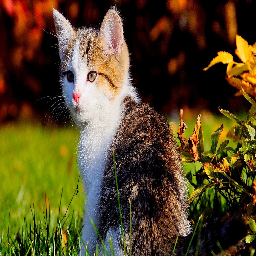

In [34]:
# load the image

img = image.load_img('/content/cat.jpg', target_size=(256,256))
print(type(img))
img

In [35]:
# Convert the image to a NumPy array
img = image.img_to_array(img)
print(type(img))
img

<class 'numpy.ndarray'>


array([[[120.,   4.,   4.],
        [127.,   2.,   0.],
        [159.,  21.,   8.],
        ...,
        [  0.,   0.,   2.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[104.,   0.,   0.],
        [122.,   4.,   0.],
        [139.,   5.,   0.],
        ...,
        [  0.,   0.,   2.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[106.,   6.,   6.],
        [116.,   7.,   4.],
        [144.,  20.,  12.],
        ...,
        [  0.,   0.,   2.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       ...,

       [[154., 182., 107.],
        [ 98., 125.,  18.],
        [ 38.,  94.,   0.],
        ...,
        [104., 123.,  31.],
        [  0.,   2.,   0.],
        [  0.,   0.,   0.]],

       [[196., 218., 143.],
        [156., 166.,  80.],
        [ 76., 118.,  20.],
        ...,
        [ 57.,  73.,  11.],
        [  0.,   0.,   8.],
        [  1.,   1.,   1.]],

       [[114., 134.,  73.],
        [126., 136.,  67.],
        [ 71., 1

In [36]:
img.shape # checking the shape of the image

(256, 256, 3)

In [37]:
# Reshape the image to have an extra dimension for the batch size
input_batch = img.reshape((1,)+img.shape)
input_batch.shape

(1, 256, 256, 3)

In [38]:
# Create an ImageDataGenerator object with the desired augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=40,  # Rotate the image randomly up to 40 degrees
    width_shift_range=0.2,  # Shift the image horizontally by up to 20% of the width
    height_shift_range=0.2,  # Shift the image vertically by up to 20% of the height
    shear_range=0.2,  # Shear the image by up to 20 degrees
    zoom_range=0.2,  # Zoom in or out by up to 20%
    horizontal_flip=True,  # Flip the image horizontally
    fill_mode='nearest'  # Fill any empty pixels with the nearest pixel value
)

In [39]:
# Generate augmented images and save them to a directory
no_of_gen_img = int(input("Enter no image to be generated: "))

i = 0
for output in datagen.flow(
    input_batch,
    batch_size=1,
    save_format='jpg',
    save_prefix='cat',
    save_to_dir='/content'
):
    i += 1
    if i > no_of_gen_img:
        break
print(f"{no_of_gen_img} images created successfully")

Enter no image to be generated: 3
3 images created successfully


# How it works:

1. Import necessary libraries: `keras.preprocessing.image` and `tensorflow.keras.preprocessing.image`.
2. Load the image: `image.load_img()` loads the image from the specified path and resizes it to the target size.
3. Convert to NumPy array: `image.img_to_array()` converts the image to a NumPy array.
4. Reshape for batch: `reshape()` adds an extra dimension for the batch size.
5. Create ImageDataGenerator: This object is configured with various augmentation parameters, such as rotation, shift, shear, zoom, and horizontal flip.
Generate and save images:
  - `input()` function prompts the user to enter the desired number of augmented images to generate and store this in `no_of_gen_img` variable.
  - `datagen.flow()` generates augmented images based on the input image and the specified parameters. The images are saved to the specified directory with the given prefix and format.
  - The loop continues until the number of generated images (`i`) exceeds the user-specified number (`no_of_gen_img`).
  - Finally, a message is printed to confirm the successful creation of the specified number of images.


Source: [Keras doc](https://www.tensorflow.org/tutorials/images/data_augmentation)